In [1]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

In [2]:
import numpy as np
import sklearn
import glob
import pandas as pd

#import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pwd

/home/nfs/rmadaj/IDUB/dc2_oligo


In [6]:
df = pd.read_csv("model/model_results.csv", index_col=0)
df

,pdb,cc_cov,chains,cc_sequence,full_sequence,full_seq_corr,cc_seq_corr,parallel,oligo_state,y_pred_parallel,y_pred_chains,prob_dimer,prob_trimer,prob_tetramer,prob_parallel,prob_antiparallel
0,3e7k,0.851852,4,TFERVEQMSIQIKEVGDRVNYIKRSLQSLDSQIGHLQDLSALTVDT,SRVTFERVEQMSIQIKEVGDRVNYIKRSLQSLDSQIGHLQDLSALT...,True,False,False,2,1,1,0.000250,0.868215,0.131535,0.999511,0.000489
1,1use,0.550000,4,YSDLQRVKQELLEEVKKELQKV,SSDYSDLQRVKQELLEEVKKELQKVKEEIIEAFVQELRKR,False,False,True,2,0,0,0.389587,0.364582,0.245831,0.247228,0.752772
2,6us8,0.826087,4,LVVAASIIGILHLILWILD,DPLVVAASIIGILHLILWILDRL,True,False,True,2,1,2,0.001932,0.008170,0.989898,0.999241,0.000759
3,5kht,0.893617,2,DAIKKKMQMLKLDKENALDRAEQAEADNYHLENEVARLKKL,GMDAIKKKMQMLKLDKENALDRAEQAEADNYHLENEVARLKKLVGER,False,True,True,0,1,0,0.995213,0.002867,0.001920,0.618886,0.381114
4,5c9n,0.671875,2,CSWEEAQLSSQLYRNKQLQDTLVQKEEELARLHEENNHLRQYL,LPDLCSWEEAQLSSQLYRNKQLQDTLVQKEEELARLHEENNHLRQY...,True,False,True,0,1,0,0.944286,0.002939,0.052775,0.917785,0.082215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,5kb1,0.888889,3,WEALEKKLAALESKCQALEKKLQALEKKHEAL,EWEALEKKLAALESKCQALEKKLQALEKKHEALEHG,False,False,True,1,1,1,0.011733,0.983537,0.004730,0.990097,0.009903
244,4h22,0.876543,2,YKKAMVSNAQLDNEKTNFMYQVDTLKDMLLELEEQLAESRRQYEEK...,EEKYKKAMVSNAQLDNEKTNFMYQVDTLKDMLLELEEQLAESRRQY...,True,False,True,0,1,0,0.993578,0.000073,0.006348,0.960177,0.039823
245,1kyc,0.800000,3,LRRRIEELERRI,EELRRRIEELERRIR,False,False,True,1,0,1,0.052497,0.553812,0.393691,0.009853,0.990147
246,2zfc,0.909091,3,LVQQQNNILRALEATQHAVQALVWGVKQLQARVLALERYI,VSGLVQQQNNILRALEATQHAVQALVWGVKQLQARVLALERYIK,False,False,True,1,1,1,0.012089,0.839583,0.148329,0.769875,0.230125


Text(0.5, 1.0, 'Parallel/antiparallel, 0.80')

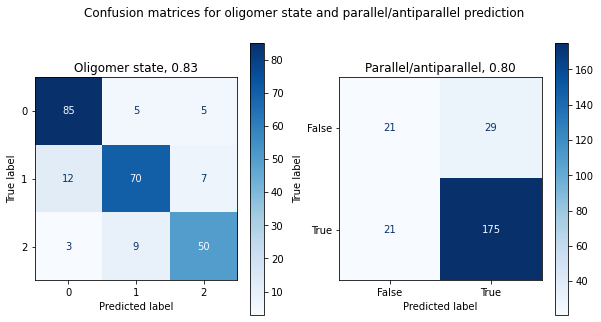

In [10]:
# ConfusionMatrixDisplay.from_predictions(df["oligo_state"], df["y_pred_chains"], cmap='Blues')
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Confusion matrices for oligomer state and parallel/antiparallel prediction')
ConfusionMatrixDisplay.from_predictions(df["oligo_state"], df["y_pred_chains"], cmap='Blues', ax=ax1)
ConfusionMatrixDisplay.from_predictions(df["parallel"], df["y_pred_parallel"], cmap='Blues', ax=ax2)
ax1.set_title(f'Oligomer state, {accuracy_score(df["oligo_state"], df["y_pred_chains"]):.2f}')
ax2.set_title(f'Parallel/antiparallel, {accuracy_score(df["parallel"], df["y_pred_parallel"]):.2f}')

In [5]:
confusion_matrix(df["y"], df["y_pred"])

array([[84,  6,  5],
       [ 7, 74,  8],
       [ 3,  7, 52]])

In [21]:
len(df)

246

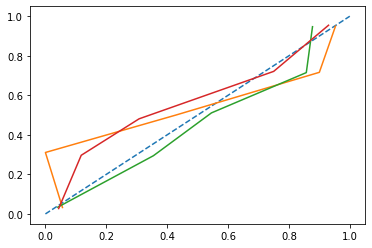

In [12]:
plt.plot([0, 1], [0, 1], linestyle='--')
for pr, i in zip(["prob_dimer", "prob_trimer", "prob_tetramer"], [0, 1, 2]):
    xc, yc = calibration_curve([1 if y_ == i else 0 for y_ in df["oligo_state"].values], df[pr].values, n_bins=5)
    plt.plot(xc, yc)

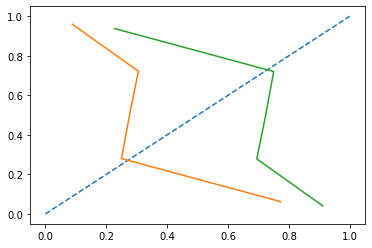

In [13]:
plt.plot([0, 1], [0, 1], linestyle='--')
for pr, i in zip(["prob_parallel", "prob_antiparallel"], [0, 1]):
    xc, yc = calibration_curve([1 if y_ == i else 0 for y_ in df["parallel"].values], df[pr].values, n_bins=5)
    plt.plot(xc, yc)

In [23]:
len(df), len(df.pdb.unique())

(246, 246)

In [30]:
!pwd

/home/nfs/jludwiczak/af2_cc/af2_multimer


In [21]:
df_ref = pd.read_csv("unified_results_updated_180823.csv", index_col=0).reset_index(drop=True)

In [69]:
#show whole dataframe
pd.set_option('display.max_rows', None)


,pdb,cc_cov_x,chains_x,cc_sequence_x,full_sequence,full_seq_corr,cc_seq_corr,parallel_x,oligo_state,y_pred_parallel,...,seq_length_difference,y_pred_logicoil,y_pred_dc2,y_true,ID,OligoState,parallel_y,prob_oligo_coconat,y_pred_coconat,logicoil_dimer_topology
0,3e7k,0.851852,4,TFERVEQMSIQIKEVGDRVNYIKRSLQSLDSQIGHLQDLSALTVDT,SRVTFERVEQMSIQIKEVGDRVNYIKRSLQSLDSQIGHLQDLSALT...,True,False,0,2,1,...,0,2,1,2,3e7k,4.0,0.0,0.536410,2,0
1,1use,0.550000,4,YSDLQRVKQELLEEVKKELQKV,SSDYSDLQRVKQELLEEVKKELQKVKEEIIEAFVQELRKR,False,False,1,2,0,...,0,0,2,2,1use,4.0,0.0,0.463654,2,1
2,6us8,0.826087,4,LVVAASIIGILHLILWILD,DPLVVAASIIGILHLILWILDRL,True,False,1,2,1,...,0,2,2,2,6us8,4.0,0.0,0.347972,2,0
8,3bj4,0.891892,4,IGARLNRVEDKVTQLDQRLALITDMLHQLLSLH,SNTIGARLNRVEDKVTQLDQRLALITDMLHQLLSLHG,True,False,1,2,1,...,0,2,1,2,3bj4,4.0,0.0,0.554400,2,0
9,4w80,0.593750,4,EDQEKLKTELRKTSDALSKAQNDVMEMKMQSERLSK,ECVLEAENKKLVEDQEKLKTELRKTSDALSKAQNDVMEMKMQSERL...,True,True,0,2,0,...,2,2,2,2,4w80,2.0,1.0,0.915429,0,0
10,3w8v,0.906250,3,VARLEKKVSALEKKVAGLEKEVARLKKLV,RVARLEKKVSALEKKVAGLEKEVARLKKLVGE,False,False,1,1,1,...,0,0,1,1,3w8v,3.0,0.0,0.473135,1,1
12,5k92,0.862069,3,WEALEKKLAALESKCQALEKKLEAL,EWEALEKKLAALESKCQALEKKLEALEHG,False,False,1,1,1,...,0,1,1,1,5k92,3.0,0.0,0.673411,1,1
13,6osd,0.757576,3,VEALEKKVEALEFKVQKLEKKVEAL,EVEALEKKVEALEFKVQKLEKKVEALEHGWDGR,False,False,1,1,1,...,0,1,1,1,6osd,3.0,0.0,0.771702,1,1
14,1jcd,0.840000,3,DQASSDAQTANAKADQASNDANAARSDAQAAKDDAARANQR,NAKADQASSDAQTANAKADQASNDANAARSDAQAAKDDAARANQRA...,True,True,1,1,1,...,1,1,1,1,1jcd,3.0,0.0,0.960353,1,0
15,1jcc,0.720000,3,AQTANAKADQASNDANAARSDAQAAKDDAARANQR,SSNAKIDQLSSDAQTANAKADQASNDANAARSDAQAAKDDAARANQ...,True,True,1,1,1,...,1,1,1,1,1jcc,3.0,0.0,0.959247,1,0


Text(0.5, 1.0, 'Parallel/antiparallel, DC2_oligo 0.77')

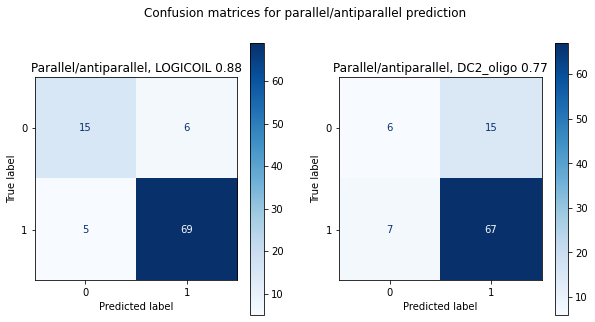

In [66]:
# df = pd.merge(df, df_ref, on="pdb")
df.keys()
df[['antiparallel_dimer_logicoil']]

# from df antiparallel_dimer_logicoil and parallel_dimer_logicoil take higher number and yield 0 if antiparallel or 1 if parallel

df['logicoil_dimer_topology'] = df[
    ['antiparallel_dimer_logicoil', 'parallel_dimer_logicoil']
    ].apply(lambda x: 0 if x[0] > x[1] else 1, axis=1)
le  = sklearn.preprocessing.LabelEncoder()
# drop duplicated columns from df
df = df.loc[:,~df.columns.duplicated()]
le.fit(df['parallel_x'])
df['parallel_x'] = le.transform(df['parallel_x'])
tdf = df.loc[df.chains_x == 2]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Confusion matrices for parallel/antiparallel prediction')

ConfusionMatrixDisplay.from_predictions(tdf["parallel_x"], tdf["logicoil_dimer_topology"], cmap='Blues', ax=ax1)
ax1.set_title(f'Parallel/antiparallel, LOGICOIL {accuracy_score(tdf["parallel_x"], tdf["logicoil_dimer_topology"]):.2f}')
ConfusionMatrixDisplay.from_predictions(tdf["parallel_x"], tdf["y_pred_parallel"], cmap='Blues', ax=ax2)
ax2.set_title(f'Parallel/antiparallel, DC2_oligo {accuracy_score(tdf["parallel_x"], tdf["y_pred_parallel"]):.2f}')
# ConfusionMatrixDisplay.from_predictions(df["logicoil_dimer_topology"], df["parallel_x"], cmap='Blues')

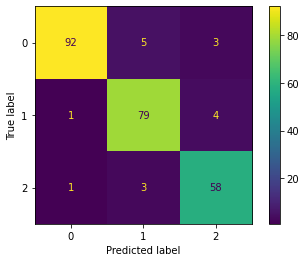

In [38]:
cm1=confusion_matrix(df["y_pred_chains"], df["y_pred_dc2"])
ConfusionMatrixDisplay(cm1).plot()

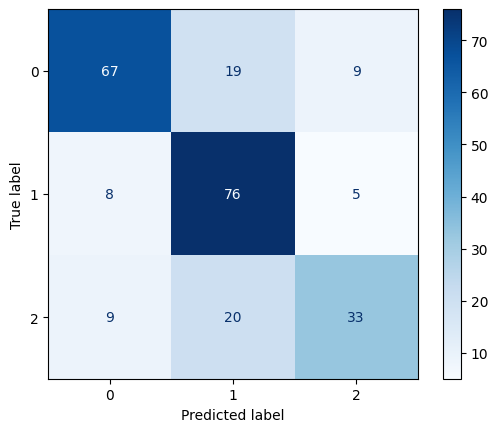

In [27]:
ConfusionMatrixDisplay.from_predictions(df["y"], df["y_pred_logicoil"], cmap='Blues')

In [41]:
f1_score(df["oligo_state"], df["y_pred_chains"], average="macro"), f1_score(df["oligo_state"], df["y_pred_logicoil"], average="macro"), f1_score(df["oligo_state"], df["y_pred_coconat"], average="macro")

(0.8291650132037974, 0.7100510825580629, 0.7541753994610243)

In [12]:
df = df[df["logicoil_seq"].str.len() >= 40]

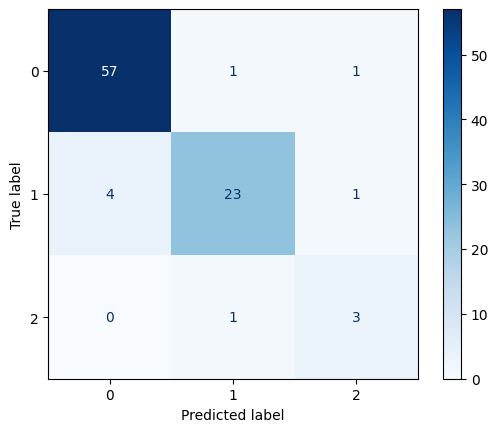

In [13]:
ConfusionMatrixDisplay.from_predictions(df["y"], df["y_pred"], cmap='Blues')

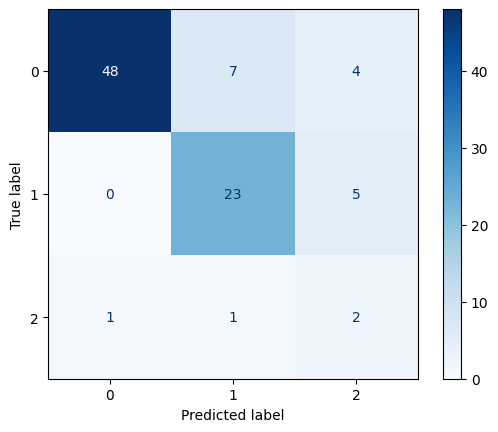

In [14]:
ConfusionMatrixDisplay.from_predictions(df["y"], df["y_pred_logicoil"], cmap='Blues')

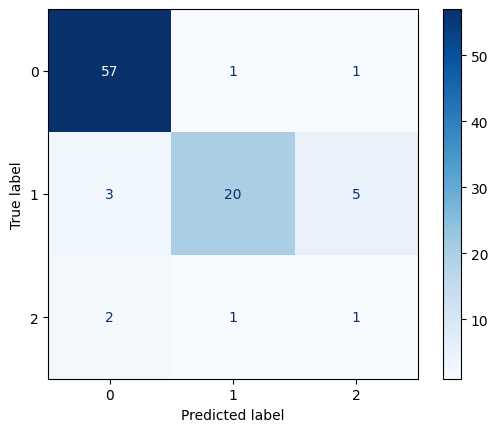

In [15]:
ConfusionMatrixDisplay.from_predictions(df["y"], df["y_pred_coconat"], cmap='Blues')

In [16]:
f1_score(df["y"], df["y_pred"], average="macro"), f1_score(df["y"], df["y_pred_logicoil"], average="macro"), f1_score(df["y"], df["y_pred_coconat"], average="macro")

(0.8281970649895177, 0.6450721908349027, 0.6413223140495868)